<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [32]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [33]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [34]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [35]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [57]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [59]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283275 entries, 0 to 287596
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            283275 non-null  object        
 1   Referencia      283275 non-null  object        
 2   Fecha_Fact      269577 non-null  datetime64[ns]
 3   Fecha_Apertura  283275 non-null  datetime64[ns]
 4   Cta_Cargo       283275 non-null  object        
 5   Nombre_Cliente  283274 non-null  object        
 6   Cta_Titular     283245 non-null  object        
 7   Nombre_Titular  283244 non-null  object        
 8   Recamb          283275 non-null  float64       
 9   Recamb_Pvp      283275 non-null  float64       
 10  Tiemp_Fact      283270 non-null  float64       
 11  Total_Mo        283275 non-null  float64       
 12  Modelo          282008 non-null  object        
 13  Recep           283275 non-null  object        
 14  Matricula       283275 non-null  obj

In [60]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2'],
      dtype='object')

In [61]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)

In [62]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [63]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,nan,1,2015,52,765578,16.38,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,nan,1,2015,39,768394,1760.67,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,nan,1,2015,3,770266,197.45,770266


In [64]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [65]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,nan,1,2015,52,765578,16.38,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,nan,1,2015,39,768394,1760.67,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,nan,1,2015,3,770266,197.45,770266


In [66]:
df.shape

(283275, 24)

In [67]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall                  0
Referencia            0
Fecha_Fact        13698
Fecha_Apertura        0
Cta_Cargo             0
Nombre_Cliente        1
Cta_Titular          30
Nombre_Titular       31
Recamb                0
Recamb_Pvp            0
Tiemp_Fact            5
Total_Mo              0
Modelo             1267
Recep                 0
Matricula             0
Bastidor             40
Tipo_Or               5
Or_Unica              0
MES                   0
AÑO                   0
ESTANCIA              0
Orden_Corta           0
Fact_total            0
Orden_Corta2          0
dtype: int64

In [68]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

188811

In [69]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

58798

In [70]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    283275.000000
mean        389.008590
std         786.283091
min           0.000000
25%          64.680000
50%         202.960000
75%         435.235000
max       32716.440000
Name: Fact_total, dtype: float64

In [50]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(283275, 24)

In [71]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-06-29 00:00:00


In [72]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    283275.000000
mean        389.008590
std         786.283091
min           0.000000
25%          64.680000
50%         202.960000
75%         435.235000
90%         822.372000
95%        1265.014000
99%        3159.162000
max       32716.440000
Name: Fact_total, dtype: float64

In [73]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

58798

In [74]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.189893
2V O.R.CLIENT MEC VW         0.135030
6A O.R. INTER MEC.AUDI       0.110859
7A PRESUPUESTO CH AUDI       0.104349
4A GARANTIA MECAN AUDI       0.091888
6V O.R. INTER MEC.VW         0.076736
7V PRESUPUESTO CH VW         0.069676
4V GARANTIA MECAN VW         0.058990
11LV O.R. MEC VW LONG DRI    0.030279
2A O.R.CLIENT MEC AUDI-CO    0.027606
11LA O.R. MEC AU LONG DRI    0.024983
5A O.R. INTER CH AUDI        0.018816
2V O.R.CLIENT MEC VW-CONT    0.017873
5V O.R. INTER CH VW          0.010615
7LA PRES  AU CH  LONG DRI    0.004275
6L O.R. INTER MEC LCV        0.003537
1A O.R.CLIENT CH AUDI        0.003100
2L O.R.CLIENT MEC LCV        0.002404
DG DEFER.GARANTIA AUDI       0.002372
2RA O.R.CLIENT MEC AUDI -    0.002369
7LV PRES  VW CH  LONG DRI    0.002164
12LA O.R. MEC AU VW RENTI    0.002051
2RV O.R.CLIENT MEC VW-CRE    0.001659
GD DEFER.GARANTIA MECAN V    0.001613
4L GARANTIA MECAN LCV        0.001599
1V O.R.CLIENT CH VW          0.001116
12LV O.R. ME

In [75]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

39

In [77]:
# voy a quitar las internas. 
df[df["Tipo_Or"].str.startswith("5" or "6")==True]

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
84,2,7572432,2015-01-07,2014-09-30,610431,REACONDICIONAMIENTO V.O,120,TORRES DE LA PEÑA JOAQU,0.00,0.00,26.00,960.00,TIGUAN 2.0,255,1243HDV,WVGZZZ5NZBW562392,5V O.R. INTER CH VW,nan,1,2015,99,757243,960.00,757243
86,2,7572435,2015-01-07,2014-09-30,610624,REACONDICIONAMIENTO V.D,120,TORRES DE LA PEÑA JOAQU,0.00,0.00,6.25,300.00,TIGUAN 2.0,255,1243HDV,WVGZZZ5NZBW562392,5A O.R. INTER CH AUDI,nan,1,2015,99,757243,300.00,757243
90,2,7640901,2015-01-07,2014-11-03,610431,REACONDICIONAMIENTO V.O,120,LIBERTY DRIVE FRANCE,143.68,287.36,4.30,159.00,VW Touran,56,6343HWH,WVGZZZ1TZEW074407,5V O.R. INTER CH VW,nan,1,2015,65,764090,302.68,764090
101,2,7706961,2015-01-07,2014-12-03,610431,REACONDICIONAMIENTO V.O,127,NO UTILIZAR,2.55,5.10,4.00,148.00,PASSAT VAR,56,1678HTL,WVWZZZ3CZEE071091,5V O.R. INTER CH VW,nan,1,2015,35,770696,150.55,770696
146,2,7739221,2015-01-07,2014-12-19,610431,REACONDICIONAMIENTO V.O,120,LIBERTY DRIVE FRANCE,304.47,608.94,2.25,67.50,VW Touran,282,0317HVR,WVGZZZ1TZEW059435,5V O.R. INTER CH VW,nan,1,2015,19,773922,371.97,773922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287500,8,13829451,2022-06-27,2022-06-24,610431,REACONDICIONAMIENTO V.O,120,Alvarez-Ossorio Piñero,0.00,0.00,1.60,48.00,POLO 1.0 E,796,2823KSV,WVWZZZAWZKY095274,5V O.R. INTER CH VW,nan,6,2022,3,1382945,48.00,1382945
287506,6,13830371,2022-06-28,2022-06-24,610431,REACONDICIONAMIENTO V.O,120,NO UTILIZAR,0.00,0.00,2.35,70.50,A6 35 TDI,796,6836LNZ,WAUZZZF21MN082708,5A O.R. INTER CH AUDI,nan,6,2022,4,1383037,70.50,1383037
287513,6,13831721,2022-06-29,2022-06-24,610622,POLITICA COMERCIAL VN A,127,NO UTILIZAR,0.00,0.00,4.00,192.00,AUDI Q5 SP,796,274280,WAUZZZFY8N2080820,5A O.R. INTER CH AUDI,nan,6,2022,5,1383172,192.00,1383172
287514,8,13831741,2022-06-29,2022-06-24,610624,REACONDICIONAMIENTO V.D,18918,JARMAUTO SA,12.00,24.00,1.60,48.00,GOLF STYLE,796,2098LLL,WVWZZZCDZMW303010,5V O.R. INTER CH VW,nan,6,2022,5,1383174,60.00,1383174


In [78]:
df = df[df["Tipo_Or"].str.startswith("5" or "6")!=True]

In [81]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

58714

In [82]:
df.shape # tenemos 274.898 filas

(274898, 24)

In [84]:
df.isnull().sum()

Tall                  0
Referencia            0
Fecha_Fact        13260
Fecha_Apertura        0
Cta_Cargo             0
Nombre_Cliente        1
Cta_Titular          30
Nombre_Titular       31
Recamb                0
Recamb_Pvp            0
Tiemp_Fact            5
Total_Mo              0
Modelo             1255
Recep                 0
Matricula             0
Bastidor             40
Tipo_Or               5
Or_Unica              0
MES                   0
AÑO                   0
ESTANCIA              0
Orden_Corta           0
Fact_total            0
Orden_Corta2          0
dtype: int64

In [86]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(274858, 24)

In [101]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [102]:
df.Bastidor.nunique() #58058 bastidores. 

58058

In [103]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260497 entries, 0 to 287596
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            260497 non-null  object        
 1   Referencia      260497 non-null  object        
 2   Fecha_Fact      260497 non-null  datetime64[ns]
 3   Fecha_Apertura  260497 non-null  datetime64[ns]
 4   Cta_Cargo       260497 non-null  object        
 5   Nombre_Cliente  260497 non-null  object        
 6   Cta_Titular     260497 non-null  object        
 7   Nombre_Titular  260497 non-null  object        
 8   Recamb          260497 non-null  float64       
 9   Recamb_Pvp      260497 non-null  float64       
 10  Tiemp_Fact      260497 non-null  float64       
 11  Total_Mo        260497 non-null  float64       
 12  Modelo          260497 non-null  object        
 13  Recep           260497 non-null  object        
 14  Matricula       260497 non-null  obj

In [104]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        0
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
dtype: int64

In [105]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [106]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578,2014,11,11,1
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,nan,1,2015,52,765578,16.38,765578,2014,11,11,1


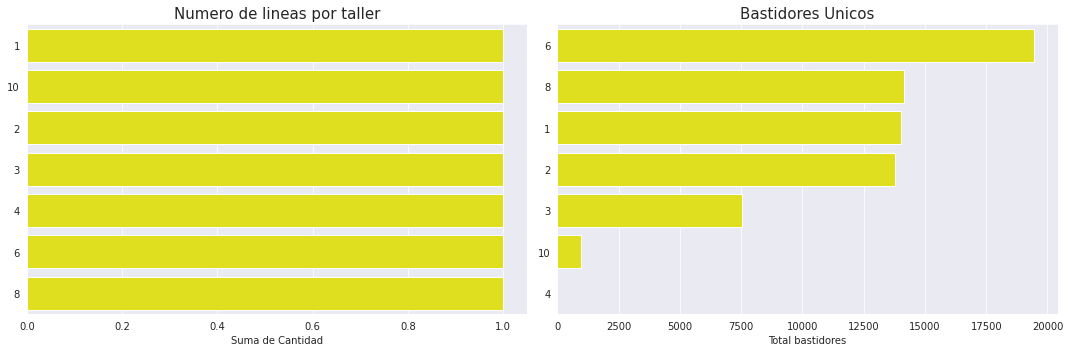

In [126]:
# voy a sacar unos graficos. 

column = ["Tall", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Numero de lineas por taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

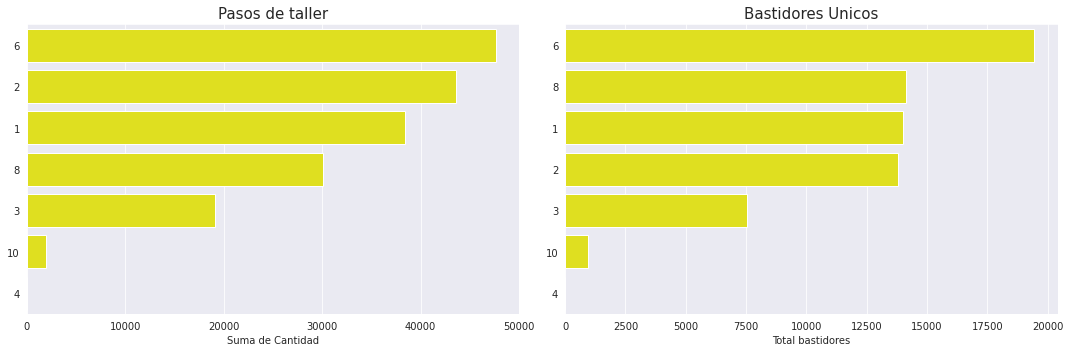

In [131]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [124]:
df.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6     19441
8     14143
1     14020
2     13796
3      7532
10      945
4         1
Name: Bastidor, dtype: int64

In [121]:
df.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
6     32190776.77
1     28314239.52
2     23021706.10
8     13262775.71
3      8402567.53
10      970342.89
4            0.00
Name: Fact_total, dtype: float64

In [133]:
df.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    18324
2018    18280
2017    17975
2021    17106
2020    16413
2016    15881
2015    14399
2022     9596
2014      534
2013       25
2005        3
2004        1
2012        1
Name: Bastidor, dtype: int64

In [119]:
# si quiero agrupar por mas de una variable se hace así. 
df.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
6     2019    5031
2     2015    4957
6     2018    4821
      2021    4812
      2020    4792
      2017    4517
2     2017    4473
      2016    4303
1     2017    4220
2     2018    4206
1     2018    4172
6     2016    4165
2     2019    4022
1     2019    3957
2     2021    3834
6     2015    3777
8     2018    3735
1     2016    3647
8     2021    3593
1     2021    3562
8     2019    3542
2     2020    3486
8     2017    3451
1     2020    3390
      2015    3332
8     2020    3177
      2016    2621
6     2022    2514
3     2017    2237
      2019    2212
1     2022    2181
2     2022    2159
3     2018    2154
      2015    2024
      2016    1977
      2020    1888
8     2022    1774
3     2021    1717
8     2015    1172
3     2022    1007
10    2019     394
      2021     392
      2020     367
2     2014     287
10    2022     206
6     2014     153
10    2018      84
1     2014      82
2     2013      11
3     2014       8
6     2013       8
8     2014       7
1